In [26]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/video-game-sales-analyze/vgsales new.csv'
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


## Check for Missing Values

In [28]:
# Check for missing values in the dataset
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [31]:
# Fill missing Year with the most frequent year (mode)
df['Year'].fillna(df['Year'].mode()[0], inplace=True)


<ipython-input-31-5e4569067a2b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].mode()[0], inplace=True)


In [33]:
# Fill missing Publisher with 'Unknown'
df['Publisher'].fillna('Unknown', inplace=True)


<ipython-input-33-5534e4d55ba9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)


### Top 10 Games by Global Sales

In [35]:
# Top 10 games by Global Sales
top_10_games = df.groupby('Name')['Global_Sales'].sum().reset_index()
top_10_games = top_10_games.sort_values(by='Global_Sales', ascending=False).head(10)

# Display the top 10 games
top_10_games


,Name,Global_Sales
11007,Wii Sports,82.74
3712,Grand Theft Auto V,55.92
9327,Super Mario Bros.,45.31
9715,Tetris,35.84
5573,Mario Kart Wii,35.82
11009,Wii Sports Resort,33.00
7346,Pokemon Red/Pokemon Blue,31.37
1222,Call of Duty: Black Ops,31.03
1228,Call of Duty: Modern Warfare 3,30.83
6723,New Super Mario Bros.,30.01


### Top Platforms by Total Global Sales

In [43]:
# Top platforms by Global Sales
top_platforms = df.groupby('Platform')['Global_Sales'].sum().reset_index()
top_platforms = top_platforms.sort_values(by='Global_Sales', ascending=False).head(10)

# Display the top platforms
top_platforms



,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


### Global Sales by Genre

In [50]:
# Global sales by Genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Display the sales by genre
genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)
genre_sales


,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


### Sales Trends Over the Years

In [53]:
# Sales trend over the years
sales_by_year = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Display the sales trend
sales_by_year


,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36
5,1985.0,53.94
6,1986.0,37.07
7,1987.0,21.74
8,1988.0,47.22
9,1989.0,73.45


### Sales by Region

In [56]:
# Sales by region
region_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
region_sales.columns = ['Region', 'Sales']

# Display the sales by region
region_sales

,Region,Sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


## Visualizations

### Top 10 Games by Global Sales

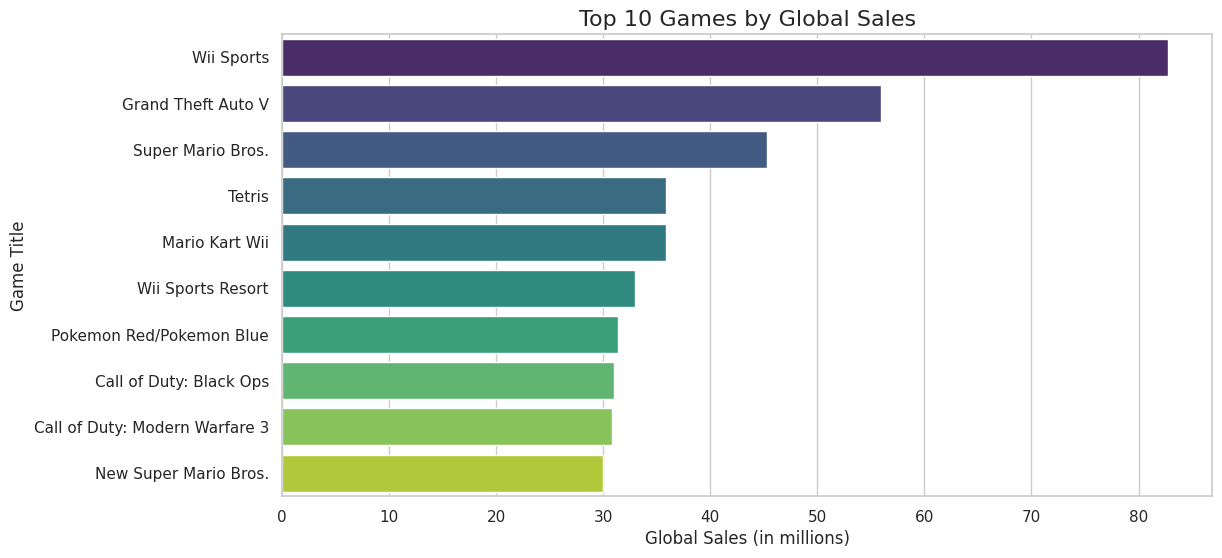

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Create a bar plot for the top 10 games by global sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_10_games, palette='viridis')

# Add labels and title
plt.title('Top 10 Games by Global Sales', fontsize=16)
plt.xlabel('Global Sales (in millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.show()

### Top Platforms by Total Global Sales

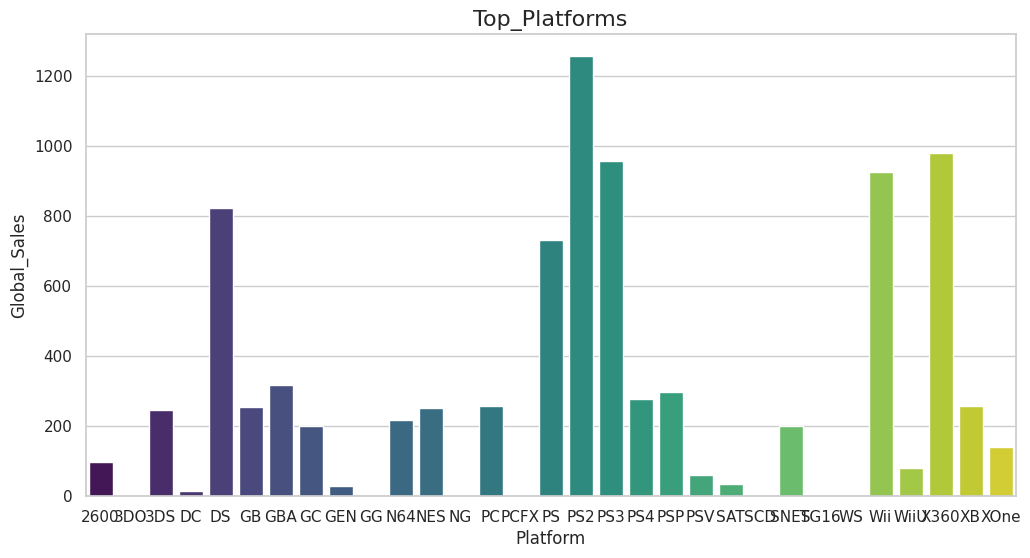

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot style
sns.set(style="whitegrid")

# Create a bar plot for the top 10 games by global sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Global_Sales', data=Top_Platforms, palette='viridis')

# Add labels and title
plt.title('Top_Platforms', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global_Sales', fontsize=12)
plt.show()